<a href="https://colab.research.google.com/github/FaizalLeviansyah/Machine_Learning-2023/blob/main/Dataset_Quiz_2_Faizal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models


11490434/11490434 [==============================] - 0s 0us/step


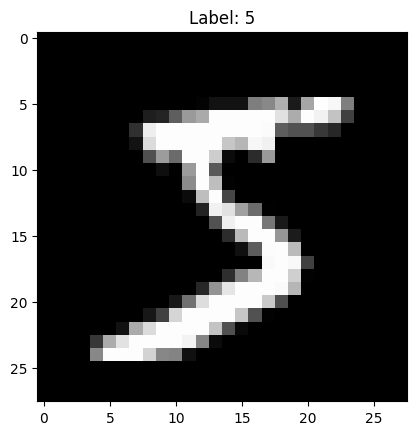

In [3]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display a sample image
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [4]:
digits_data = np.vstack([train_images, test_images])
digits_labels = np.hstack([train_labels, test_labels])



In [5]:
digits_data.shape

(70000, 28, 28)

In [6]:
# Check label shape
digits_labels.shape

(70000,)

<Axes: xlabel='Labels', ylabel='count'>

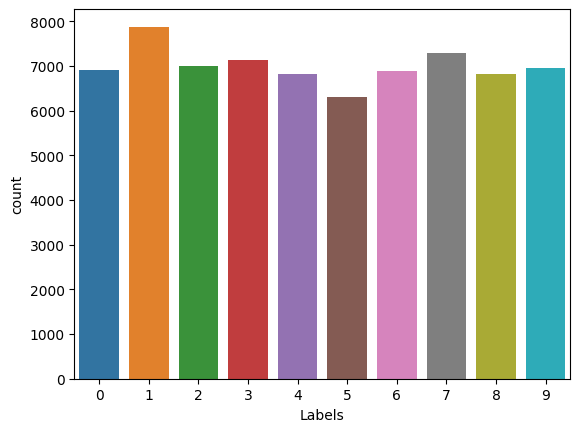

In [7]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

In [8]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip


--2023-12-08 01:40:10--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  70.8MB/s    in 2.6s    

2023-12-08 01:40:13 (70.8 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [9]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()


In [10]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:

# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [12]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [13]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

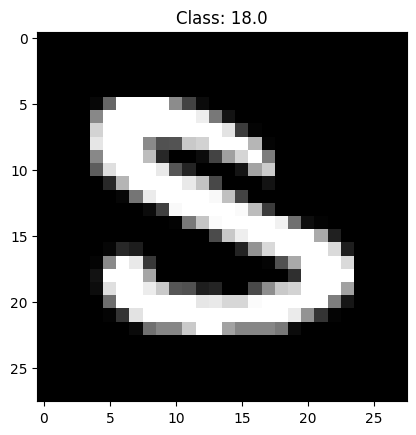

In [14]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));


<Axes: xlabel='Labels', ylabel='count'>

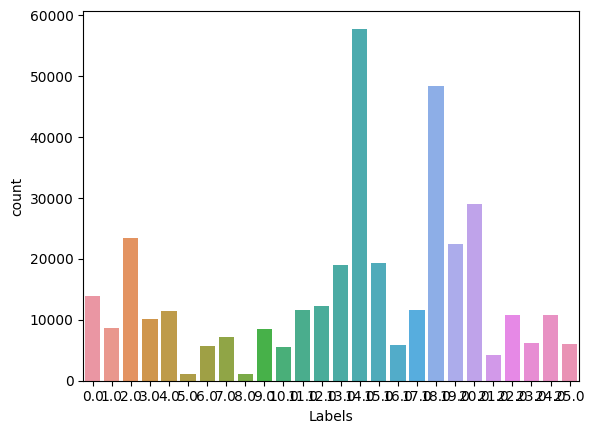

In [15]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

In [16]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:

# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [18]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10


In [19]:

# check alphabet labels again
np.unique(alphabet_labels)


array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [20]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [21]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [22]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [23]:

# Convert data to float32
data = np.array(data, dtype = 'float32')


In [24]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

In [25]:
# Normalize data
data /= 255.0


In [26]:

# Check range value of data
data[0].min(), data[0].max()


(0.0, 1.0)

In [27]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)


In [28]:
# Check labels shape
labels.shape


(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

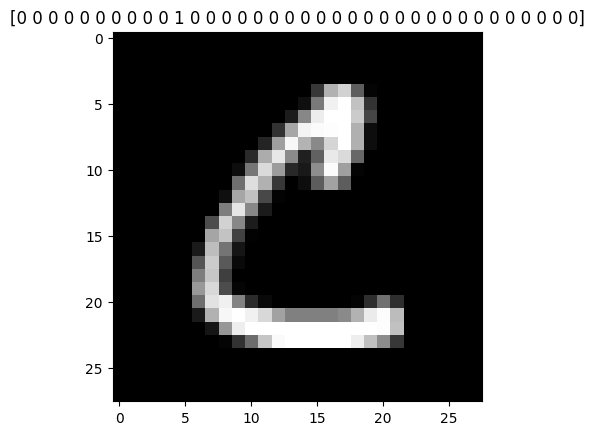

In [29]:

# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [30]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [31]:
# Check the biggest value of data
classes_total.max()


57825

In [32]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)


In [34]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

In [36]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
# Build the network
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(36, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [38]:
# Check network summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [39]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [40]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128


In [41]:
# Setup checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [42]:
# Fit the model
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.5203 - accuracy: 0.8037
Epoch 1: val_loss improved from inf to 0.23699, saving model to custom_ocr.model
2765/2765 [==============================] - 128s 42ms/step - loss: 2.5196 - accuracy: 0.8037 - val_loss: 0.2370 - val_accuracy: 0.9020
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9895 - accuracy: 0.9014
Epoch 2: val_loss improved from 0.23699 to 0.19214, saving model to custom_ocr.model
2765/2765 [==============================] - 134s 48ms/step - loss: 0.9895 - accuracy: 0.9014 - val_loss: 0.1921 - val_accuracy: 0.9261
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.9142
Epoch 3: val_loss did not improve from 0.19214
2765/2765 [==============================] - 123s 44ms/step - loss: 0.8303 - accuracy: 0.9142 - val_loss: 0.4264 - val_accuracy: 0.8231
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7616 - accu

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Example data
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, each with 10 features
y = np.random.randint(2, size=(1000,))  # Binary labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define your neural network architecture
input_size = 10  # Number of features in your input data
output_size = 1  # Binary classification, so the output is a single value

network = Sequential()
network.add(Dense(units=64, activation='relu', input_shape=(input_size,)))
network.add(Dense(units=32, activation='relu'))
network.add(Dense(units=output_size, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
network.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Now you can make predictions
predictions = network.predict(X_test, batch_size=32)


Epoch 1/10
20/20 [==============================] - 4s 11ms/step - loss: 0.7217 - accuracy: 0.4969 - val_loss: 0.6914 - val_accuracy: 0.5500
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5500 - val_loss: 0.6916 - val_accuracy: 0.5375
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.5688 - val_loss: 0.6877 - val_accuracy: 0.5375
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6712 - accuracy: 0.6062 - val_loss: 0.6881 - val_accuracy: 0.5437
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6203 - val_loss: 0.6890 - val_accuracy: 0.5375
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6266 - val_loss: 0.6904 - val_accuracy: 0.5437
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6406 - val_loss: 0.6908 - val_accuracy: 0.5562
Epoch 8/10
20/20 [=

In [51]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]


array([0.528232], dtype=float32)

In [52]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

0

In [53]:
# Check label for 24
name_labels[18]

'I'

In [54]:
# Check y_test label for 0
y_test[1]

1

In [55]:
# check the highest value
np.argmax(y_test[1])


0

In [56]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'0'

Make an evaluation on data

In [57]:
# Evaluate on test data
network.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5250


[0.6868656277656555, 0.5249999761581421]

In [62]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [63]:
print(np.unique(y_test))
print(np.unique(predictions))

[0 1]
[0]


In [64]:
print(y_test.shape)
print(predictions.shape)

(200,)
(200, 1)


In [67]:
from sklearn.metrics import classification_report

# Assuming y_test and predictions are 1D arrays of integers
print(classification_report(y_test, predictions, target_names=name_labels))

ValueError: ignored

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])


In [ ]:
# You can also check the another metrics
history.history.keys()


In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

In [ ]:
SAVE THE MODEL

In [ ]:
 The result will show in colab directory
network.save('network', save_format= 'h5')
